In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

## Analyze redispatch data

In [4]:
df_redispatch = pd.read_csv('data/output/geo_redispatch_data.csv')
print(f'Total redispatch measures: {len(df_redispatch)}\n')

Total redispatch measures: 17312



### General statistics

#### Types of RD measures

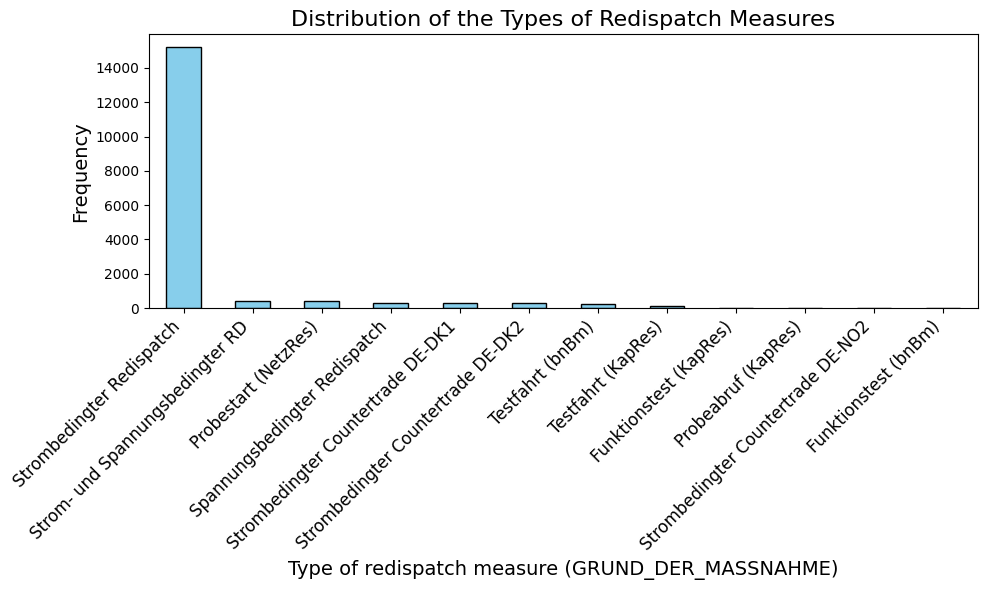

In [6]:
counts = df_redispatch['GRUND_DER_MASSNAHME'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of the Types of Redispatch Measures', fontsize=16)
plt.xlabel('Type of redispatch measure (GRUND_DER_MASSNAHME)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


In [7]:
df_redispatch = df_redispatch[df_redispatch['GRUND_DER_MASSNAHME'] == 'Strombedingter Redispatch']

#### Redispatched units

Frequency analysis

In [8]:
counts = df_redispatch['BETROFFENE_ANLAGE'].value_counts()
sorted_counts = counts.sort_values(ascending=False)
print(sorted_counts)

BETROFFENE_ANLAGE
Vorarlberger Ilwerke                       658
OWP UW Büttel                              643
OWP UW Dörpen-West                         606
Börse                                      459
Schwarze Pumpe (Standort)                  343
                                          ... 
AVA Cluster Hannover West                    1
50H Leipzig Nord GuD                         1
AMP_LEW_VERTEILNETZ_NORD_CR_SONSTIGE_EE      1
GERSTEINW_K1                                 1
AMP_WESTNETZ_EMSLAND_CR_WIND                 1
Name: count, Length: 311, dtype: int64


Quantity analysis - we assume that the column GESAMTE_ARBEIT_MWH indicates the total redispatch volume for the specified time period.

In [9]:
df_redispatch['GESAMTE_ARBEIT_MWH'] = df_redispatch['GESAMTE_ARBEIT_MWH'].str.replace(',', '.').astype(float)
sum_values = df_redispatch.groupby('BETROFFENE_ANLAGE')['GESAMTE_ARBEIT_MWH'].sum()
sorted_sum_values = sum_values.sort_values(ascending=False)
print(sorted_sum_values)

BETROFFENE_ANLAGE
OWP UW Büttel                                  1955256.42
OWP UW Dörpen-West                             1374023.86
Emsland Block D                                 705135.00
Rheinhafen-Dampfkraftwerk Karlsruhe Block 8     590245.50
OWP UW Diele                                    482718.70
                                                  ...    
AMP_LEW_VERTEILNETZ_SUED_CR_SONSTIGE_EE              7.00
50H Leipzig Süd GuD                                  4.00
AVA Cluster Algermissen T412                         2.58
Wemag CAT Cluster Perleberg 003                      2.00
50H Leipzig Nord GuD                                 2.00
Name: GESAMTE_ARBEIT_MWH, Length: 311, dtype: float64


### Temporal analysis

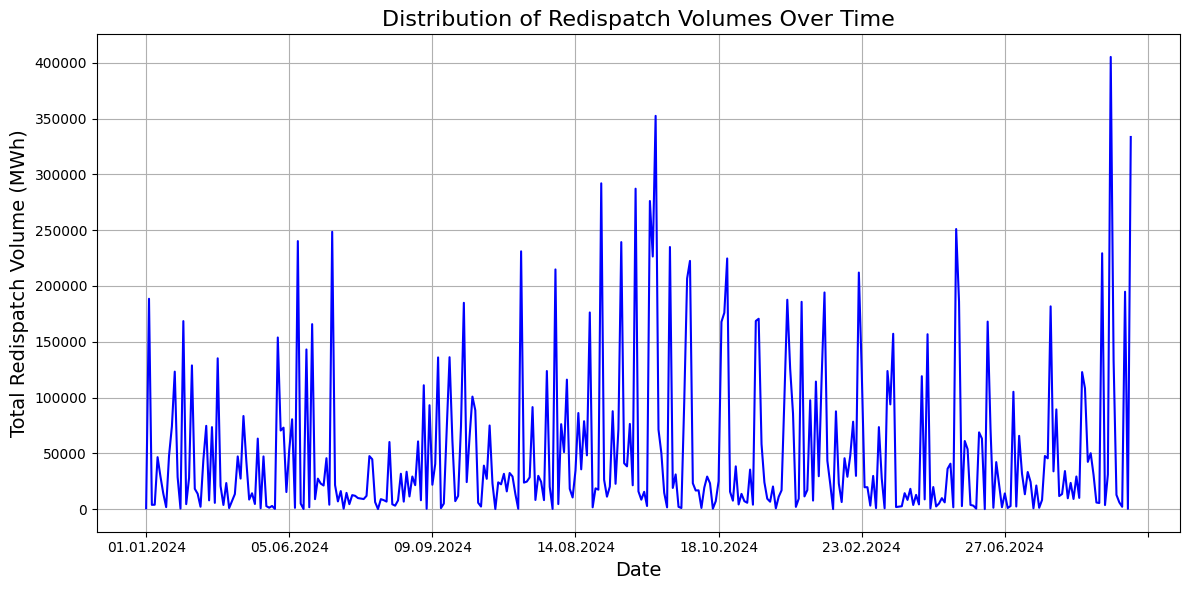

In [10]:
daily_sum = df_redispatch.groupby('BEGINN_DATUM')['GESAMTE_ARBEIT_MWH'].sum()

plt.figure(figsize=(12, 6))
daily_sum.plot(color='blue')
plt.title('Distribution of Redispatch Volumes Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Redispatch Volume (MWh)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


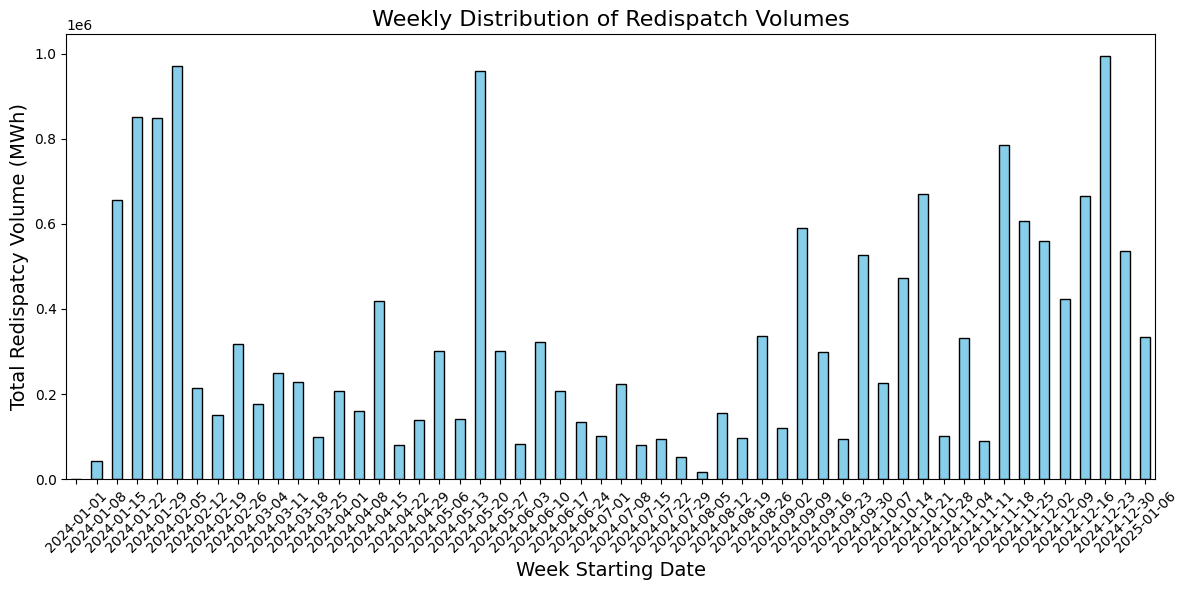

In [11]:
df_redispatch['BEGINN_DATUM'] = pd.to_datetime(df_redispatch['BEGINN_DATUM'], dayfirst=True)
weekly_sum = df_redispatch.resample('W-MON', on='BEGINN_DATUM')['GESAMTE_ARBEIT_MWH'].sum()

plt.figure(figsize=(12, 6))
weekly_sum.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Weekly Distribution of Redispatch Volumes', fontsize=16)
plt.xlabel('Week Starting Date', fontsize=14)
plt.ylabel('Total Redispatcy Volume (MWh)', fontsize=14)
plt.xticks(ticks=range(len(weekly_sum)), labels=weekly_sum.index.strftime('%Y-%m-%d'), rotation=45)
plt.tight_layout()
plt.show()
